Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [68]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_curve
import seaborn as sn

In [69]:
df = pd.read_csv("../data/mobile-price-classification/train.csv")

In [70]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [71]:
len(df)

2000

In [72]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [73]:
X = df.drop("price_range", axis=1)
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [74]:
clf = LinearSVC(max_iter=1000, dual="auto").fit(X_train, y_train)

In [75]:
clf.score(X_test, y_test)

0.7925

In [76]:
params = {
    "C": [0.9, 0.7, 0.4],
    "max_iter": [2000, 3000, 4000]
}

In [77]:
rs_clf = RandomizedSearchCV(clf, params, n_iter=5, cv=5).fit(X_train, y_train)

In [78]:
rs_clf.best_params_

{'max_iter': 4000, 'C': 0.4}

In [79]:
rs_clf.score(X_test, y_test)

0.7625

In [80]:
random_forst = RandomForestClassifier().fit(X_train, y_train)
random_forst.score(X_test, y_test)

0.8975

In [81]:
y_preds = random_forst.predict(X_test)

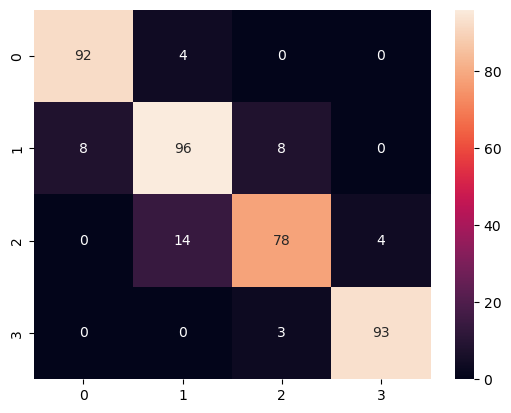

In [82]:
# Metrics
cm = confusion_matrix(y_test, y_preds)
sn.heatmap(cm, annot=True);

In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        96
           1       0.84      0.86      0.85       112
           2       0.88      0.81      0.84        96
           3       0.96      0.97      0.96        96

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [84]:
y_proba = random_forst.predict_proba(X_test)[:, 1]

In [85]:
df_test = pd.read_csv("../data/mobile-price-classification/test.csv").drop("id", axis=1)
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [86]:
y_preds = random_forst.predict(df_test)

In [87]:
df_test["price_range"] = pd.Series(y_preds)

In [88]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [89]:
df.sort_values(by="price_range", ascending=False)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3
1297,956,0,1.9,1,1,0,42,0.1,133,7,...,403,1614,3700,10,0,7,1,1,0,3
1287,860,1,1.3,1,1,1,49,0.7,141,6,...,692,979,3869,16,14,20,1,1,1,3
465,1583,1,1.6,0,5,1,42,0.8,118,3,...,275,862,3652,14,10,9,1,0,0,3
466,1653,0,0.5,1,2,1,37,0.9,176,4,...,447,1785,3955,19,4,18,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,882,0,0.7,1,9,1,28,0.2,151,6,...,248,884,751,19,11,8,1,0,1,0
1361,1549,1,1.5,1,0,1,27,0.4,113,5,...,632,1162,436,10,8,11,1,0,0,0
1362,1991,0,2.2,1,1,1,42,0.7,82,1,...,366,613,722,6,5,10,1,1,0,0
1363,796,0,0.5,0,2,0,12,0.5,114,1,...,174,518,1075,7,3,2,0,1,0,0


In [90]:
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64